In [1]:
from google.colab import drive
drive.mount('/content/drive')

!cp /content/drive/My\ Drive/Colab\ Notebooks/Colab\ Data/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v/content
!chmod 600 /root/.kaggle/kaggle.json

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
- path is now set to: /content


In [0]:
!kaggle datasets download -d alxmamaev/flowers-recognition

flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace flowers/daisy/10140303196_b88d3d6cec.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
import os
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd

# Preparing dataset

In [0]:
base_dir = '/content/datasets/alxmamaev/flowers-recognition/flowers'
IMG_SIZE = 128
def makedata(X,Y,path,z):
    img_dir = os.path.join(base_dir, path)
    y = np.array([int(i == z) for i in range(5)])
    for filename in os.listdir(img_dir):
        img = cv2.imread(os.path.join(img_dir,filename))
        if img is not None:
            img = cv2.resize(img,(IMG_SIZE, IMG_SIZE))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = img/255
            X.append(img)
            Y.append(y)
    return X, Y

def packdata():
    X = []
    Y = []
    dirs = [f for f in os.listdir(base_dir)]
    for i in tqdm(range(5)):
        X,Y = makedata(X,Y,dirs[i],i)
    return np.array(X), np.array(Y)

In [4]:
X, Y = packdata()
flowerNames = dirs = [f for f in os.listdir(base_dir)]

100%|██████████| 5/5 [00:11<00:00,  2.36s/it]


# Visualising some of the flowers from the dataset.

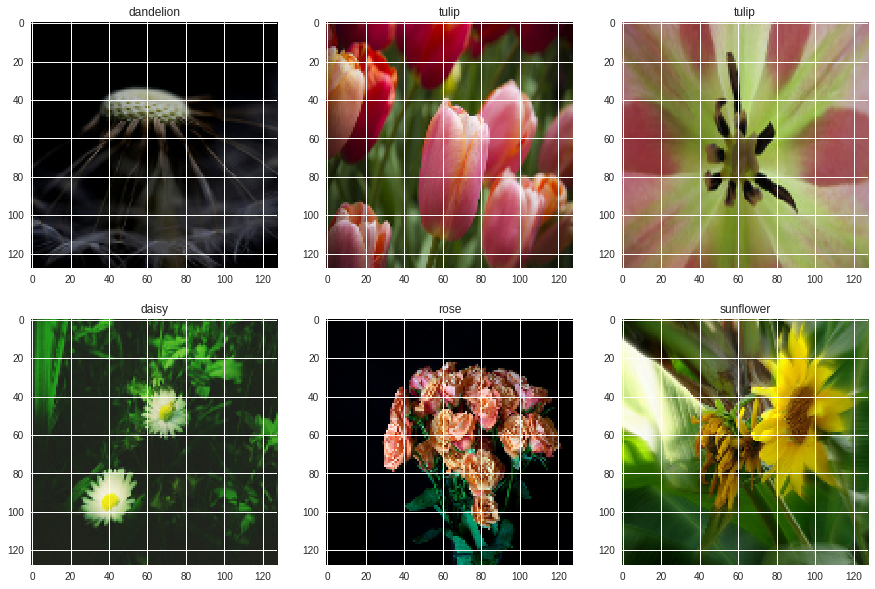

In [111]:
fig = plt.figure(figsize=(15, 10))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img,lbl = X[i*601],Y[i*601]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img)
    plt.title(flowerNames[np.argmax(lbl)])
plt.show()

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25, shuffle=True,random_state = 0)

# Defining architecture of our model

In [8]:
# MODEL ARCHITECTURE

clf = keras.models.Sequential()

clf.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,3)))
clf.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

clf.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
clf.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

clf.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
clf.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
clf.add(keras.layers.Dropout(0.5))


clf.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation ='relu'))
clf.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
clf.add(keras.layers.Dropout(0.5))

clf.add(keras.layers.Flatten())
clf.add(keras.layers.Dense(units=1024,activation='relu'))
clf.add(keras.layers.Dropout(0.5))
clf.add(keras.layers.Dense(units=512,activation='relu'))
clf.add(keras.layers.Dropout(0.5))
clf.add(keras.layers.Dense(units=5,activation='softmax'))


clf.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 128)       0         
__________

In [9]:
history = clf.fit(xtrain,ytrain,epochs=25,batch_size=64, validation_split=0.2)

Train on 2593 samples, validate on 649 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
2593/2593 [==============================] - 9s 4ms/sample - loss: 1.6209 - acc: 0.2460 - val_loss: 1.4569 - val_acc: 0.3467
Epoch 2/25
2593/2593 [==============================] - 7s 3ms/sample - loss: 1.3072 - acc: 0.4092 - val_loss: 1.1769 - val_acc: 0.5039
Epoch 3/25
2593/2593 [==============================] - 7s 3ms/sample - loss: 1.1584 - acc: 0.4882 - val_loss: 1.0875 - val_acc: 0.5716
Epoch 4/25
2593/2593 [==============================] - 7s 3ms/sample - loss: 1.0954 - acc: 0.5488 - val_loss: 1.0489 - val_acc: 0.5932
Epoch 5/25
2593/2593 [==============================] - 7s 3ms/sample - loss: 0.9995 - acc: 0.5954 - val_loss: 0.9996 - val_acc: 0.6102
Epoch 6/25
2593/2593 [==============================] - 7s 3ms/sample - loss: 0.9137 - acc: 0.6437 - val_loss: 0.9541 - val_acc: 0.6194
Epoch 7/25
2593/2593 [==============================] - 7s 3ms/sample - loss: 0.8659 - ac

In [12]:
testLoss, testAccuracy = clf.evaluate(xtest,ytest)
print("Test Accuracy: ", testAccuracy)

1081/1081 [==============================] - 1s 1ms/sample - loss: 1.1191 - acc: 0.7114
Test Accuracy:  0.71137834


# Plotting Loss and Accuracy against epochs run.

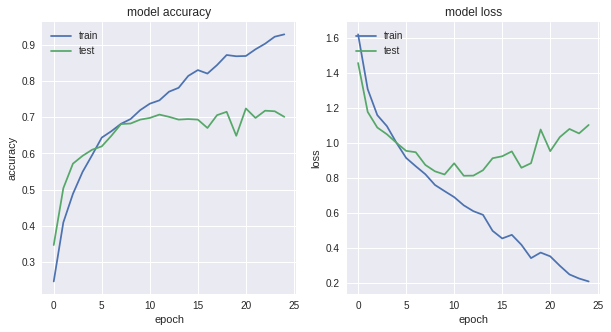

In [17]:
# summarize history for accuracy
fig = plt.figure(figsize=(10,5))

fig.add_subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


# summarize history for loss
fig.add_subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.show()

In [0]:
predictions = clf.predict(xtest)

In [0]:
flowers = np.array(flowerNames)
true_flower = flowers[np.argmax(ytest,axis=1)]
predicted_flower = flowers[np.argmax(predictions,axis=1)]

# Visualising prediction results

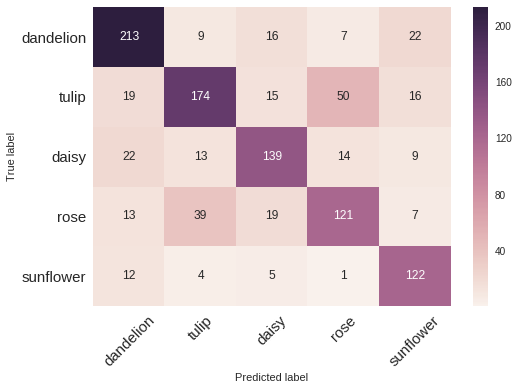

In [106]:
cm = confusion_matrix(predicted_flower,true_flower,labels=flowers)
df = pd.DataFrame(cm,index=flowers,columns=flowers)
heatmap = sb.heatmap(df,annot=True,fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Dandelions are misclassified as sunflowers and vice versa also. Similarly there are misclassifications between tulips and roses.

In [63]:
print(classification_report(predicted_flower,true_flower,labels=flowers))

              precision    recall  f1-score   support

   dandelion       0.76      0.80      0.78       267
       tulip       0.73      0.64      0.68       274
       daisy       0.72      0.71      0.71       197
        rose       0.63      0.61      0.62       199
   sunflower       0.69      0.85      0.76       144

   micro avg       0.71      0.71      0.71      1081
   macro avg       0.71      0.72      0.71      1081
weighted avg       0.71      0.71      0.71      1081



# Saving weights and model

In [0]:
clf.save_weights('flowers.h5')
clf_json = clf.to_json()
with open("flowers.json","w") as jsonfile:
    jsonfile.write(clf_json)